# **HEART DISEASE ANALYSIS** 

## **About Heart Disease**

> Cardiovascular diseases or heart diseases describe a range of conditions that affect the human heart. According to WHO statistics, 17.9 million people die from heart disease every year. The medical study says that human lifestyle is the main reason behind this heart problem. However, there are many other key factors which govern the chances of heart disease.

> The main goal of this project is to develop a Machine Learning model that can predict the absence (0) or presence (1) of heart disease being suffered by the patient using information on 13 physiological attributes.

## **About the Data set**
> This dataset gives the information related to heart disease. It contain 14 columns, wherein target is the class variable which is affected by the other 13 columns. Here, the aim is to classify the target variable to (disease\non disease) using different machine learning algorithms and findout which algorithm is best-suited for this dataset.

> **Attribute Information**
> * age: age in years
> * sex: sex (1 = male; 0 = female)
> * cp: chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
> * trestbps: resting blood pressure (in mm Hg on admission to the hospital)
> * chol: serum cholestoral in mg/dl
> * fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> * restecg: resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
> * thalach: maximum heart rate achieved
> * exang: exercise induced angina (1 = yes; 0 = no)
> * oldpeak = ST depression induced by exercise relative to rest
> * slope: the slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)
> * ca: number of major vessels (0-3) colored by flourosopy
> * thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
> * condition: 0 = no disease, 1 = disease

## Table of Contents
1) Import Packages

2) Data Preprocesing

3) Exploratory Data Analysis

4) Machine Learning models

5) Model Evaluation

7) Conclusion

## **Import Packages**

In [102]:
#Basic
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Exploratory Data Analysis
from collections import Counter
import pandas_profiling as pp

#Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Data Modelling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import export_graphviz #plot tree

#Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

import eli5 #for attribute importance
from eli5.sklearn import PermutationImportance

In [92]:
data = pd.read_csv('../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
data.info()

## **Data Preprocessing**

### Missing Value Detection

In [ ]:
data.isnull().sum()

### Descriptive Statistics

In [95]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Preprocessing

In [96]:
#Name columns
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
#Conversion of data type
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 0] = 'normal'
data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'reversable defect'

In [99]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [100]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,69,male,typical angina,160,234,greater than 120mg/ml,left ventricular hypertrophy,131,no,0.1,flat,1,normal,0
1,69,female,typical angina,140,239,lower than 120mg/ml,normal,151,no,1.8,upsloping,2,normal,0
2,66,female,typical angina,150,226,lower than 120mg/ml,normal,114,no,2.6,downsloping,0,normal,0
3,65,male,typical angina,138,282,greater than 120mg/ml,left ventricular hypertrophy,174,no,1.4,flat,1,normal,1
4,64,male,typical angina,110,211,lower than 120mg/ml,left ventricular hypertrophy,144,yes,1.8,flat,0,normal,0


## **Exploratory Data Analysis**

##### *Let's find out people of which sex had the most heart diseases.*

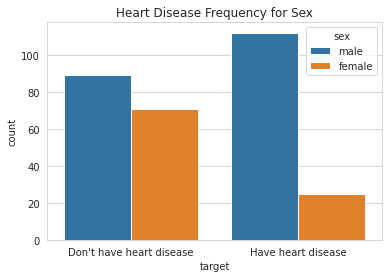

In [103]:
fig = sns.countplot(x = 'target', data = data, hue = 'sex')
fig.set_xticklabels(labels=["Don't have heart disease", 'Have heart disease'], rotation=0)
plt.title("Heart Disease Frequency for Sex");

##### *Next, let's plot the relationship between the chest pain type the patient had and (i) their age and (ii) their sex.*

<AxesSubplot:xlabel='chest_pain_type', ylabel='age'>

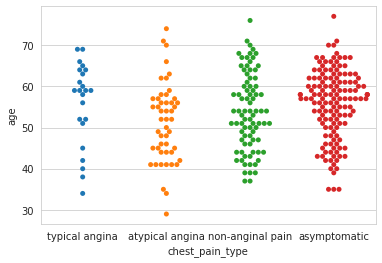

In [104]:
# Distribution of age vs chest pain type
sns.swarmplot(x='chest_pain_type', y='age', data=data)

<Axes.ArtistList of 8 patches>


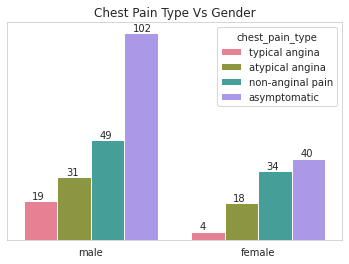

In [105]:
# Distribution of gender vs chest pain type
ax = sns.countplot(hue= 'chest_pain_type' ,x='sex',data=data ,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
print(ax.patches)

##### *Now let's find out people with which type of chest pain are most prone to having a heart disease.*

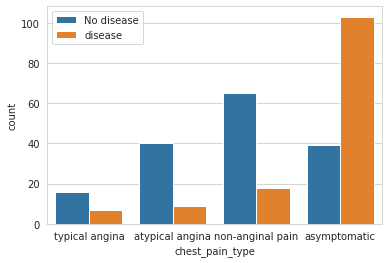

In [106]:
fig = sns.countplot(x = 'chest_pain_type', data = data, hue = 'target')
#fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

##### *Now let's observe the distribution of Age vs Maximum heart rate when people have heart disease.*

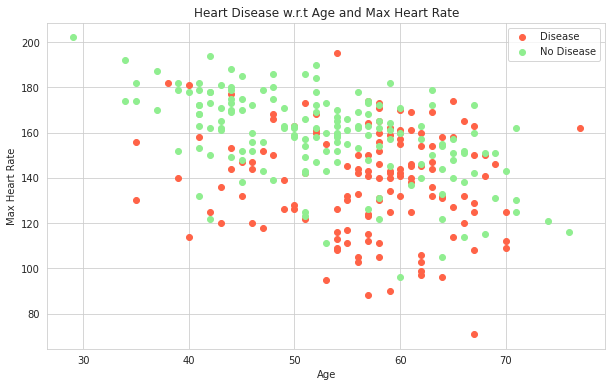

In [107]:
# Creating a scatterplot 
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(data.age[data.target==1], 
            data.max_heart_rate_achieved[data.target==1], 
            c="tomato")

#plotting the values for people who don't have heart disease
plt.scatter(data.age[data.target==0], 
            data.max_heart_rate_achieved[data.target==0], 
            c="lightgreen")

# Adding info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

##### *Now let's find out people of which sex had more exercise induced angina.*

[Text(0, 0, "Doesn't have exang"), Text(1, 0, 'Has exang')]

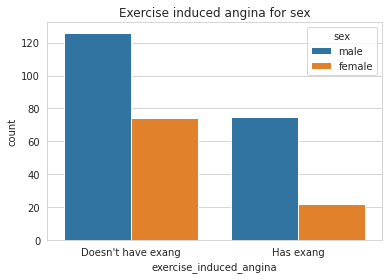

In [108]:
fig = sns.countplot(x = 'exercise_induced_angina', data = data, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)

##### *Let's investigate the correlation between the numerical attributes of the dataset.*

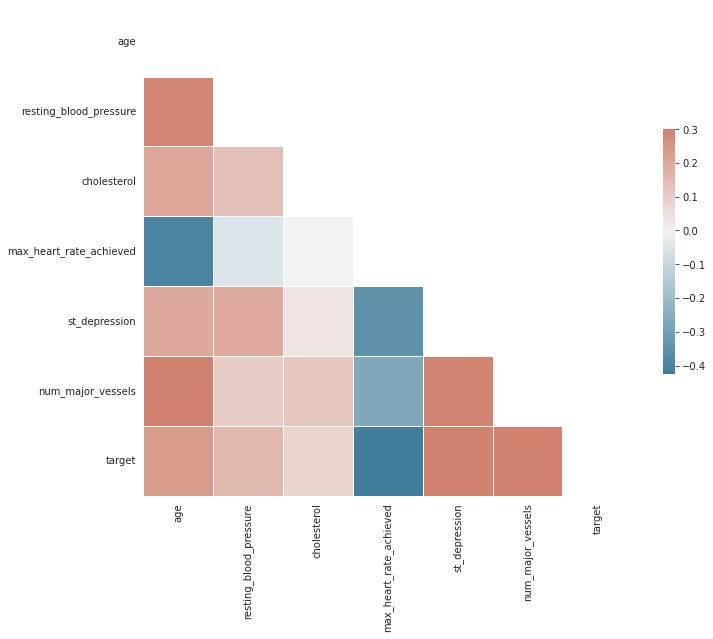

In [109]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## **Model preparation**

#### One-hot encoding

In [110]:
#Creation of labels, etc.
labels = data['target']
data = data.drop('target', axis = 1)

In [111]:
#Using Dummy variables to convert categorical to numerical
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,69,160,234,131,0.1,1,1,0,0,1,0,1,0,0,1,0,1,0
1,69,140,239,151,1.8,2,0,0,0,1,1,0,1,0,0,1,1,0
2,66,150,226,114,2.6,0,0,0,0,1,1,0,1,0,0,0,1,0
3,65,138,282,174,1.4,1,1,0,0,1,0,1,0,0,1,0,1,0
4,64,110,211,144,1.8,0,1,0,0,1,1,1,0,1,1,0,1,0


#### Data Splitting

In [112]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 3)

print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (237, 18)
Shape of x_test : (60, 18)
Shape of y_train : (237,)
Shape of y_test : (60,)


## **Machine Learning models**

Here I try out different machine learning algorithms and evaluate which algorithm predicts the target most accurately.

1. Logistic Regression Classifier
2. Random Forest Classifier
3. Extreme Gradient Boost Classifier
4. K-Nearest Neighbours Classifier
5. Decision Tree Classifier
6. Support Vector Classifier 


In [113]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=10000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy of Logistic Regression Classifier:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression Classifier: 83.33333333333334 



In [114]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')

Accuracy of Random Forest Classifier: 81.66666666666667 



In [115]:
m3 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Accuracy of Extreme Gradient Boost Classifier:",xgb_acc_score*100,'\n')

Accuracy of Extreme Gradient Boost Classifier: 75.0 



In [116]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of K-Nearest Neighbors Classifier:",knn_acc_score*100,'\n')

Accuracy of K-Nearest Neighbors Classifier: 60.0 



In [117]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')

Accuracy of Decision Tree Classifier: 68.33333333333333 



In [118]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')

Accuracy of Support Vector Classifier: 61.66666666666667 



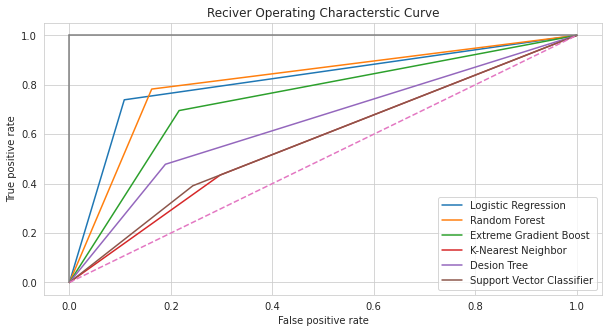

In [119]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

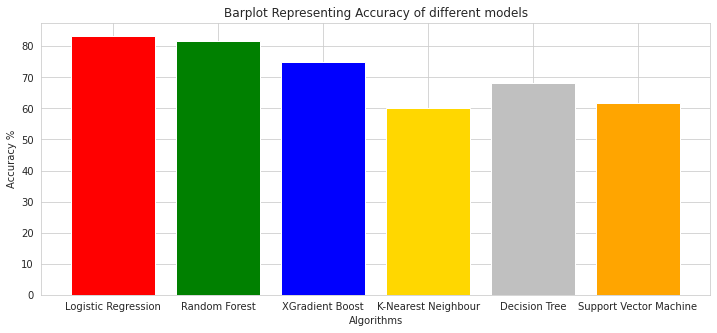

In [120]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','XGradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
colors = ['red','green','blue','gold','silver','orange']
plt.figure(figsize=(12,5))
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

#### The Logistic Regression Classifier and Random Forest Classifier have the highest accuracy in predicting the target variable.
#### Now, let's closely study the Random Forest Classifier.

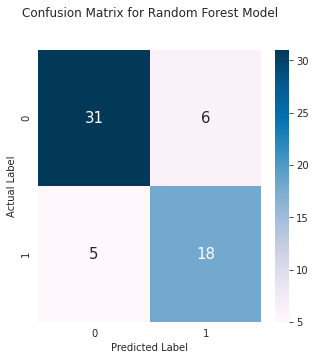

In [121]:
#Confusion Matrix for RF Classifier
cm = confusion_matrix(y_test, rf_predicted)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')
plt.title('Confusion Matrix for Random Forest Model', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [122]:
#Classification Report for RF Classifier
cr = classification_report(y_test, rf_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.75      0.78      0.77        23

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



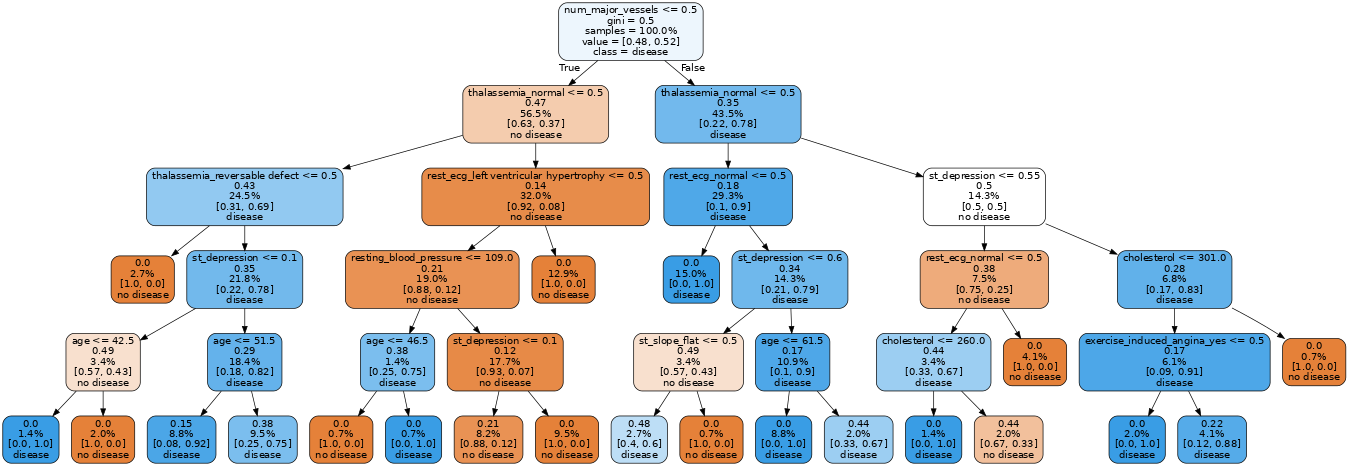

In [123]:
#Display Tree (https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c)
estimator = rf.estimators_[3]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')


In [124]:
#Sensitivity and Specificity
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8611111111111112
Specificity :  0.75


In [125]:
rf_y_pred_quant = rf.predict_proba(X_test)[:, 1] #store predicted probabilites

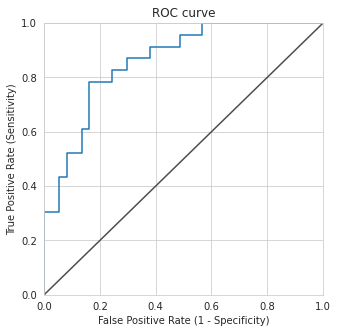

In [126]:
#Receiver Operating Characteristic Curve

falsepr, truepr, thresholds = roc_curve(y_test, rf_y_pred_quant) #Create true and false positive rates

fig, ax = plt.subplots()
ax.plot(falsepr, truepr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (5,15)
plt.title('ROC curve', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [127]:
#Area Under Curve
auc = auc(falsepr, truepr)
print("AUC Score :", auc)

AUC Score : 0.8601645123384254


#### Analysis

In [128]:
#Weights/Importance of each feature
perm = PermutationImportance(rf, random_state = 10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0767 ± 0.0686,num_major_vessels
0.0367 ± 0.0327,thalassemia_reversable defect
0.0333 ± 0.0471,sex_male
0.0333 ± 0.0471,age
0.0267 ± 0.0163,rest_ecg_normal
0.0267 ± 0.0163,chest_pain_type_typical angina
0.0200 ± 0.0249,st_slope_flat
0.0200 ± 0.0327,max_heart_rate_achieved
0.0200 ± 0.0327,cholesterol
0.0133 ± 0.0133,exercise_induced_angina_yes
